In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV
df = pd.read_csv("survey_users.csv")
df.head()


,age,gender,income,utilities,entertainment,school_fees,shopping,healthcare
0,34,Male,10800.0,200.0,500.0,1200.0,400.0,700.0
1,45,Female,67000.0,3400.0,450.0,10000.0,4500.0,16000.0
2,40,Female,40000.0,5600.0,450.0,3500.0,12000.0,13500.0
3,23,Male,70000.0,400.0,1200.0,3400.0,400.0,6500.0
4,38,Male,90000.0,450.0,3600.0,10800.0,3400.0,12000.0


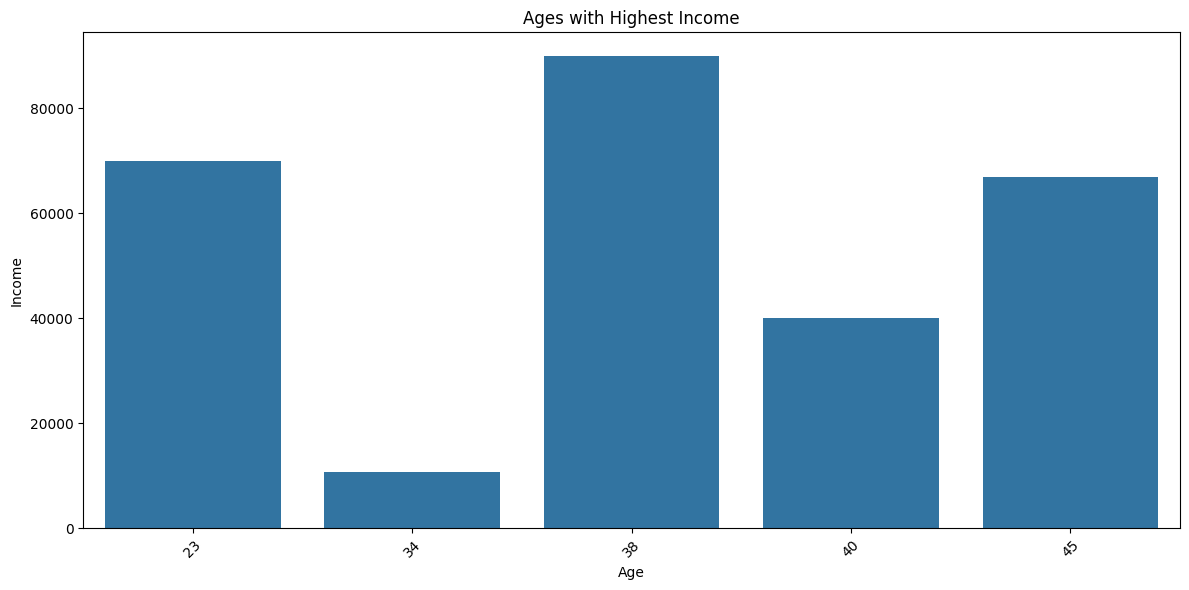

In [3]:
# Group by age and get the maximum income
income_by_age = df.groupby('age')['income'].max().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=income_by_age.index, y=income_by_age.values)
plt.title('Ages with Highest Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("ages_with_highest_income.png")
plt.show()


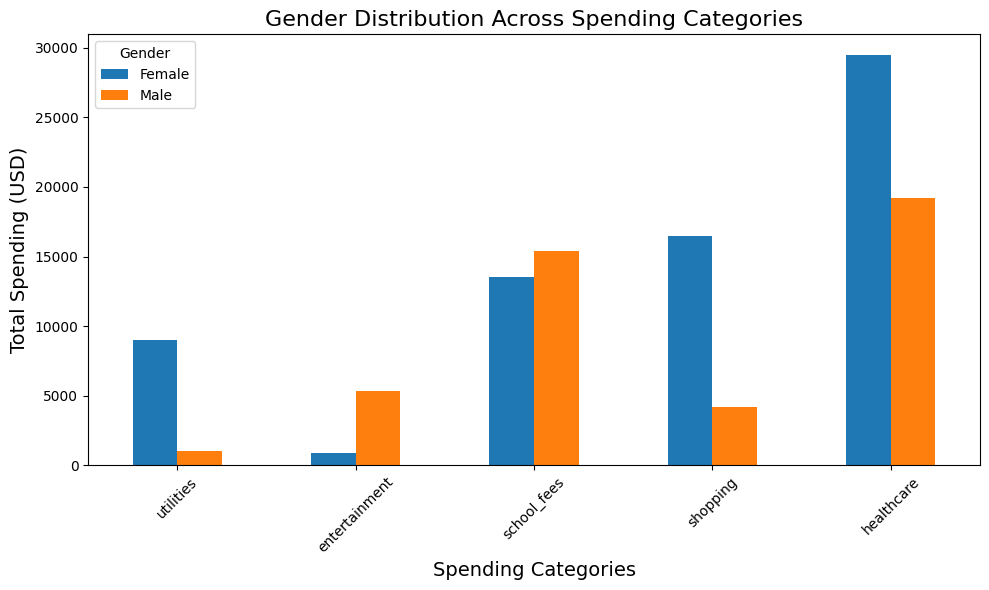

In [5]:
# Group by gender and sum the expenses
gender_spending = df.groupby('gender')[['utilities', 'entertainment', 'school_fees', 'shopping', 'healthcare']].sum()

# Plot
gender_spending.T.plot(kind='bar', figsize=(10,6))

plt.title('Gender Distribution Across Spending Categories', fontsize=16)
plt.ylabel('Total Spending (USD)', fontsize=14)
plt.xlabel('Spending Categories', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.savefig("gender distribution across spending categories.png")
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10708\2052323482.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=healthcare_by_gender.index, y=healthcare_by_gender.values, palette='pastel')


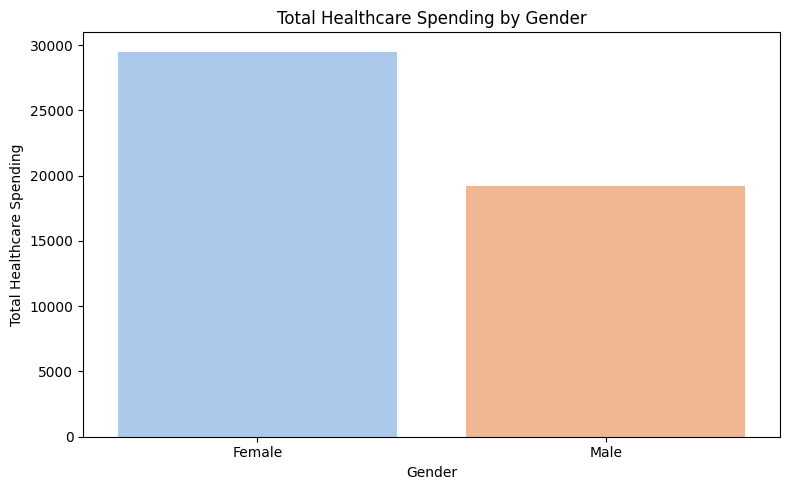

In [5]:
# Healthcare spending by gender
healthcare_by_gender = df.groupby('gender')['healthcare'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=healthcare_by_gender.index, y=healthcare_by_gender.values, palette='pastel')
plt.title('Total Healthcare Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Healthcare Spending')
plt.tight_layout()
plt.savefig("healthcare_spending_by_gender.png")
plt.show()


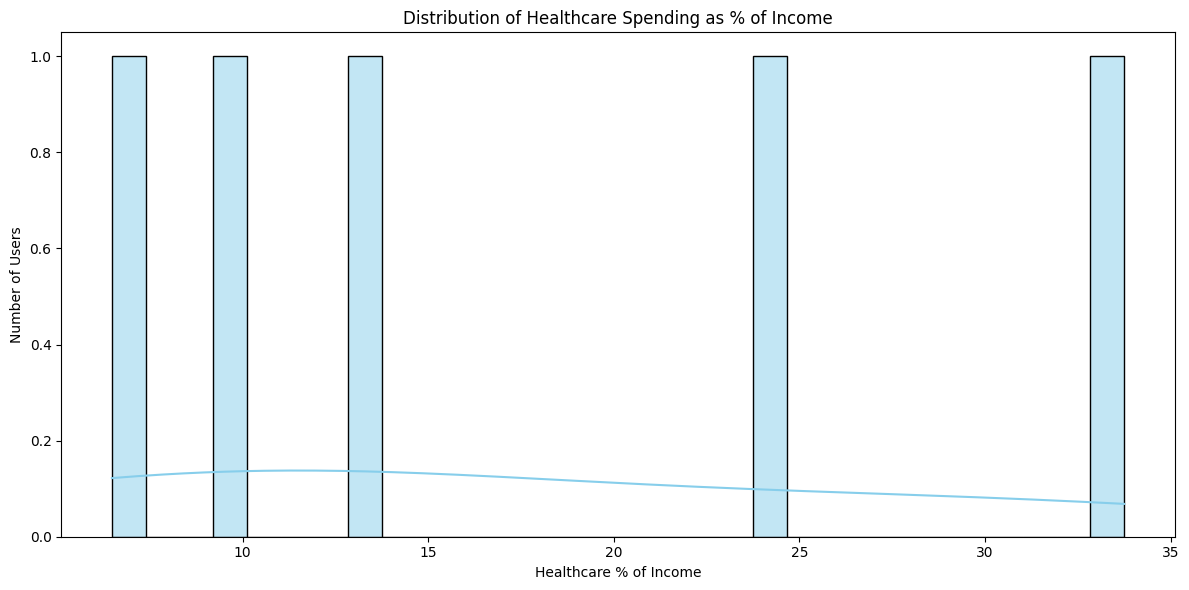

In [7]:
# Add a new column: Healthcare Spending as % of Income
df['healthcare_percent_income'] = (df['healthcare'] / df['income']) * 100

plt.figure(figsize=(12,6))
sns.histplot(df['healthcare_percent_income'], bins=30, kde=True, color="skyblue")
plt.title('Distribution of Healthcare Spending as % of Income')
plt.xlabel('Healthcare % of Income')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.savefig("healthcare_spending_percentage.png")
plt.show()
